[View in Colaboratory](https://colab.research.google.com/github/saedhussain/CNN_Fashion_MNIST_Keras/blob/master/fashion_mnsit_dense.ipynb)

In [9]:
# Import libraries
import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [10]:
# Import the fashion mnis dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [0]:
# Dictionay for reference of classes
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

In [12]:
#Examine the data imported
print("Shape of the train data: " + str(train_images.shape))
print("Shape of the test data: " + str(test_images.shape))
print("Shape of the train labels: " + str(train_labels.shape))
print("Shape of the test labels: " + str(test_labels.shape))




Shape of the train data: (60000, 28, 28)
Shape of the test data: (10000, 28, 28)
Shape of the train labels: (60000,)
Shape of the test labels: (10000,)


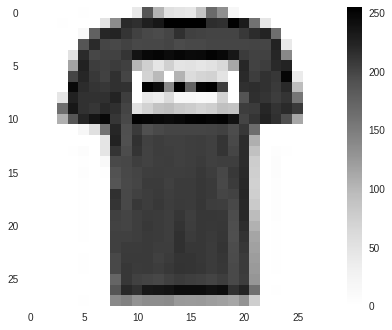

In [13]:
# See how a image looks
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(False)

In [0]:
# Preprocess data. Normalise to be between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

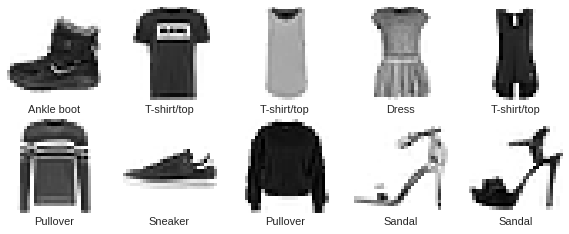

In [15]:
# Let's plot 10 images to see how they look
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.5033 - acc: 0.8225
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3788 - acc: 0.8630
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.3407 - acc: 0.8752
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.3154 - acc: 0.8840
Epoch 5/10
40480/60000 [===================>..........] - ETA: 1s - loss: 0.2969 - acc: 0.8927

60000/60000 [==============================] - 4s 64us/step - loss: 0.2995 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2845 - acc: 0.8952
Epoch 7/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2710 - acc: 0.9010
Epoch 8/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2602 - acc: 0.9037
Epoch 9/10
51232/60000 [========================>.....] - ETA: 0s - loss: 0.2522 - acc: 0.9053

60000/60000 [==============================] - 4s 65us/step - loss: 0.2507 - acc: 0.9059
Epoch 10/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2422 - acc: 0.9095


In [19]:
# Evalute accuracy on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test accuracy: 0.8874


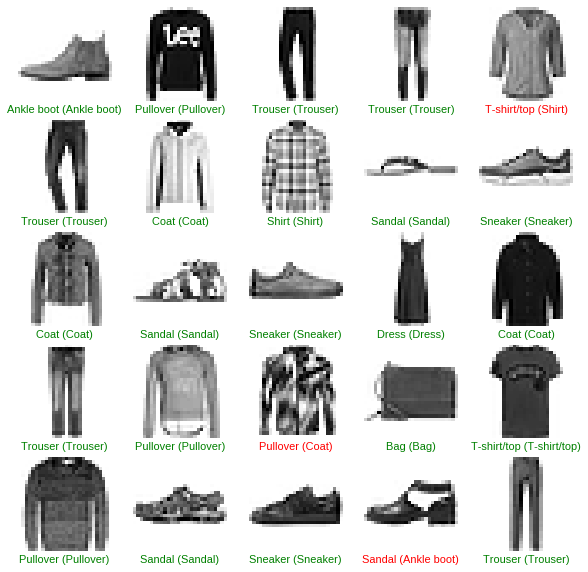

In [20]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)